<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Titanic-Project/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

#Loading Data Set

In [3]:
data_01 = pd.read_csv( "https://raw.githubusercontent.com/UM1412/Data-Set/main/Titanic%20Data.csv" )

#Preparing Data & Exploratory Data Analysis 

In [4]:
data_01.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_01.shape

(891, 12)

In [6]:
data_01.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_01.duplicated().sum()

0

In [8]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_01.describe ( include = "all" ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [10]:
data_01.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
data_01['Age'].fillna(data_01['Age'].mean(), inplace=True)

In [12]:
data_01['Cabin'].fillna(data_01['Cabin'].mode()[0], inplace=True)

In [13]:
data_01['Embarked'].fillna(data_01['Embarked'].mode()[0], inplace=True)

In [14]:
data_01.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

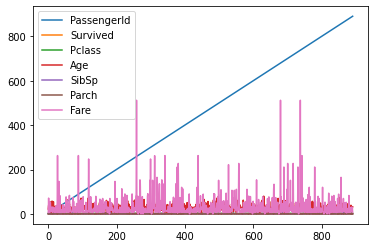

In [15]:
data_01.plot();

In [16]:
data_01['Survived'].unique()

array([0, 1])

In [17]:
data_01['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

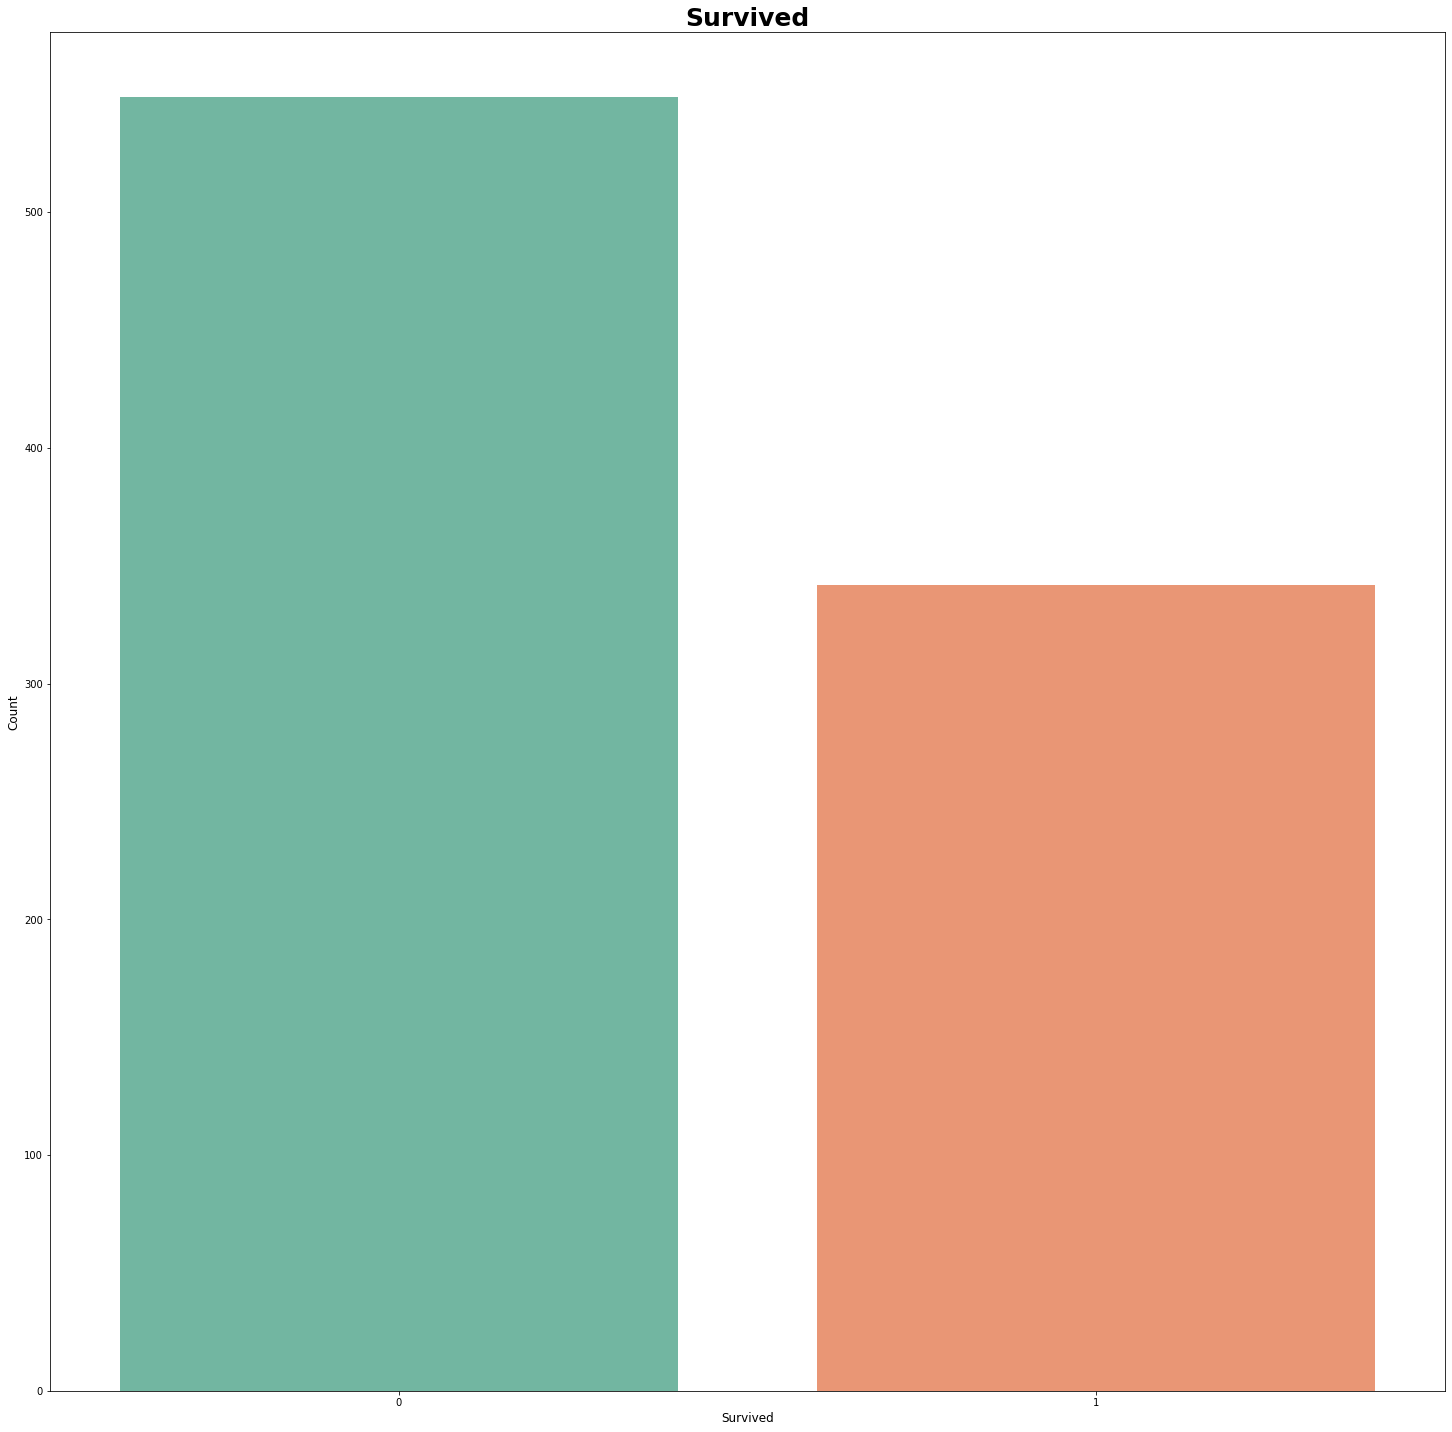

In [18]:
plt.figure(figsize=(25,25))
sns.countplot(x = data_01["Survived"], data = data_01, palette = 'Set2' )
plt.xlabel('Survived', fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Survived", fontweight='bold',fontsize = 25)
plt.show()

In [19]:
data_01['Pclass'].unique()

array([3, 1, 2])

In [20]:
data_01['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

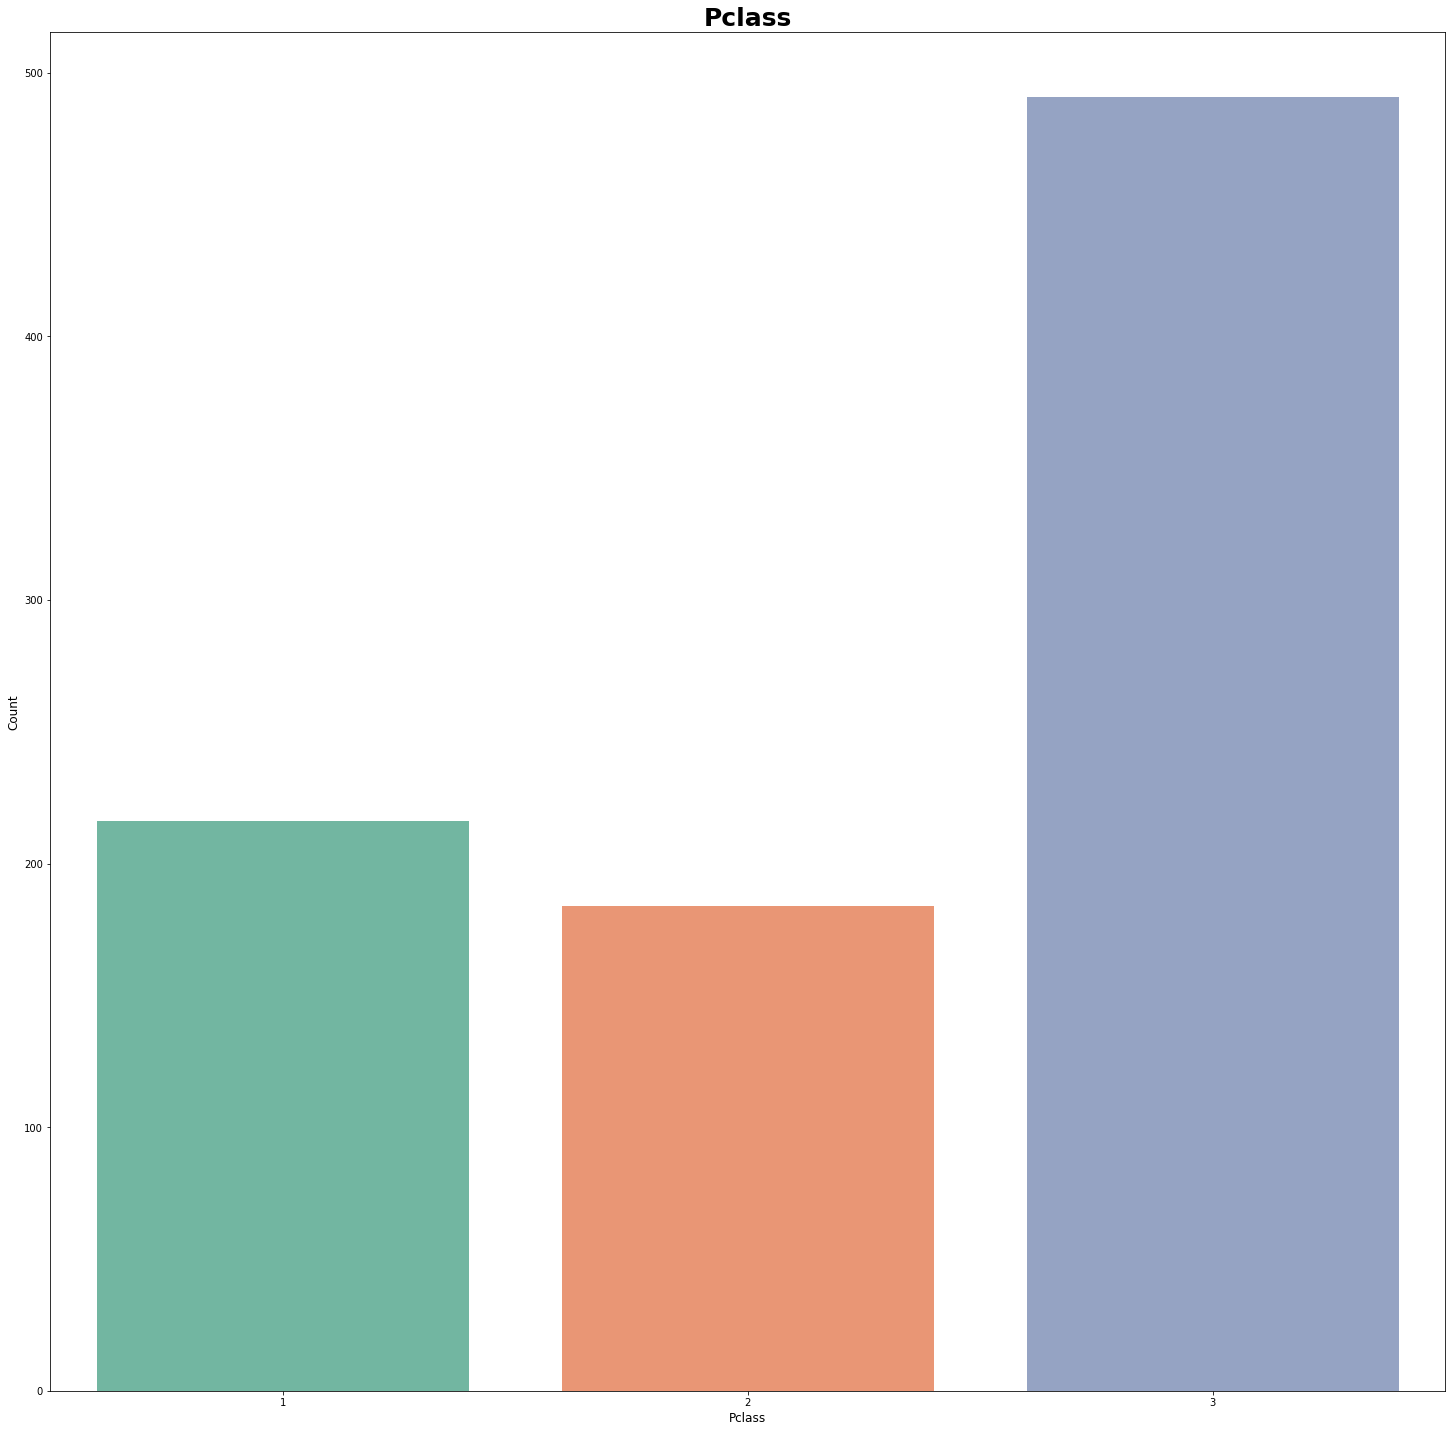

In [21]:
plt.figure(figsize=(25,25))
sns.countplot(x = data_01["Pclass"], data = data_01, palette = 'Set2' )
plt.xlabel('Pclass', fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Pclass", fontweight='bold',fontsize = 25)
plt.show()

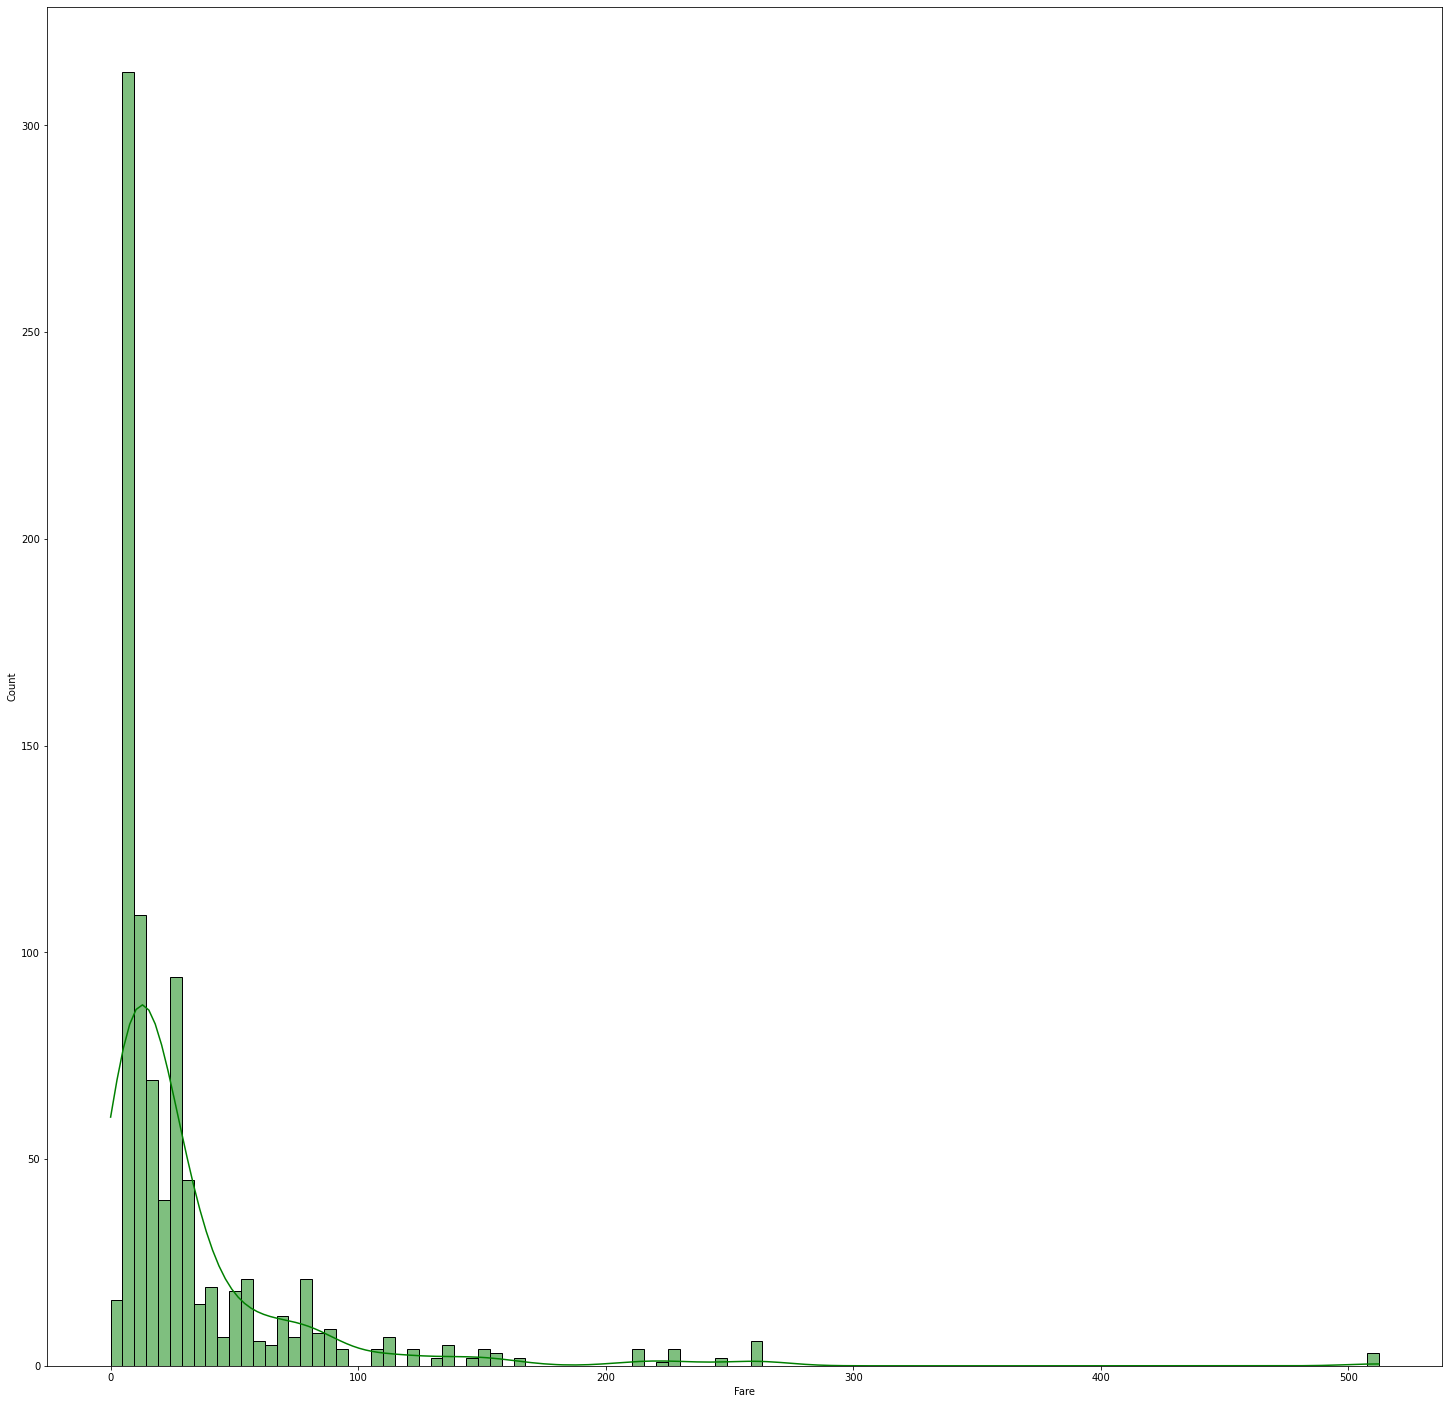

In [22]:
plt.figure(figsize=(25,25))
sns.histplot(data_01,x='Fare',kde=True,color='Green')
plt.show()

<ipython-input-23-ef561e2114bf>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_01['Age'], kde = True, bins = 20, palette = 'hls')


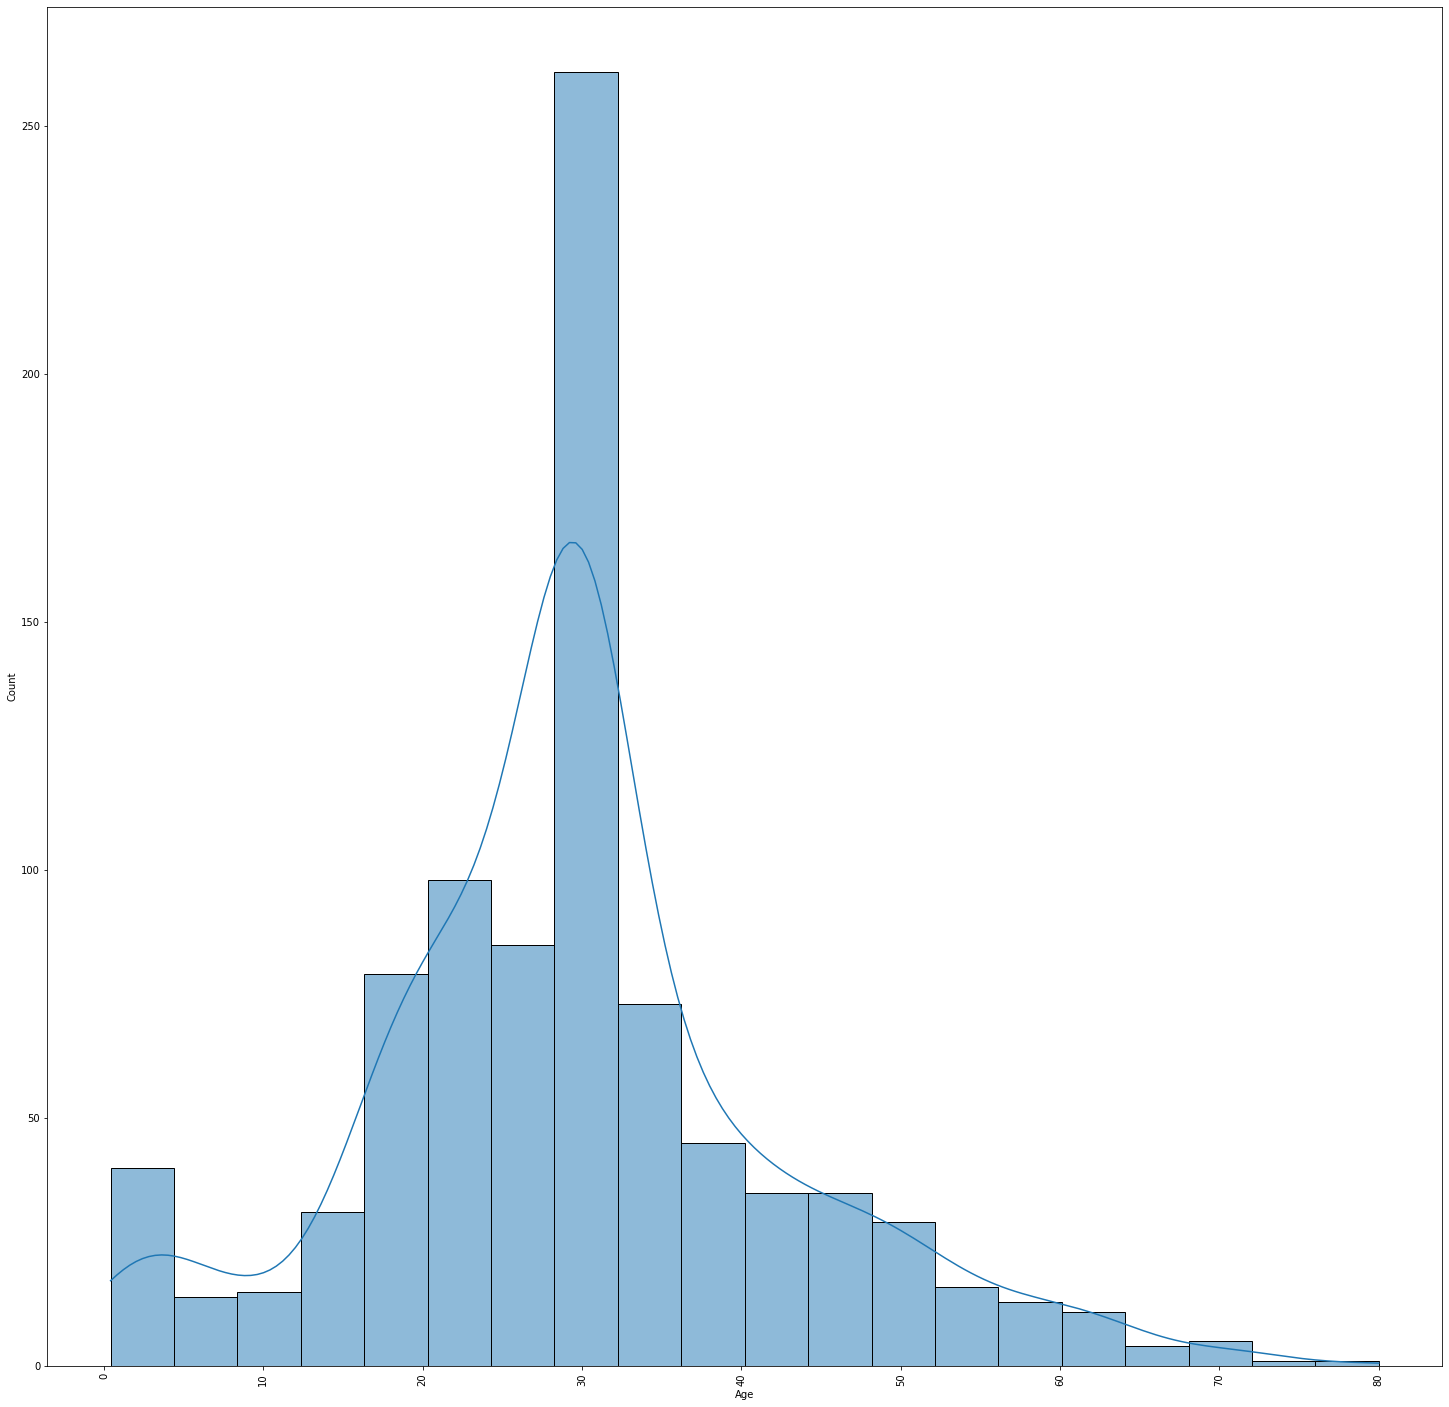

In [23]:
plt.figure(figsize=(25,25))
sns.histplot(data_01['Age'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

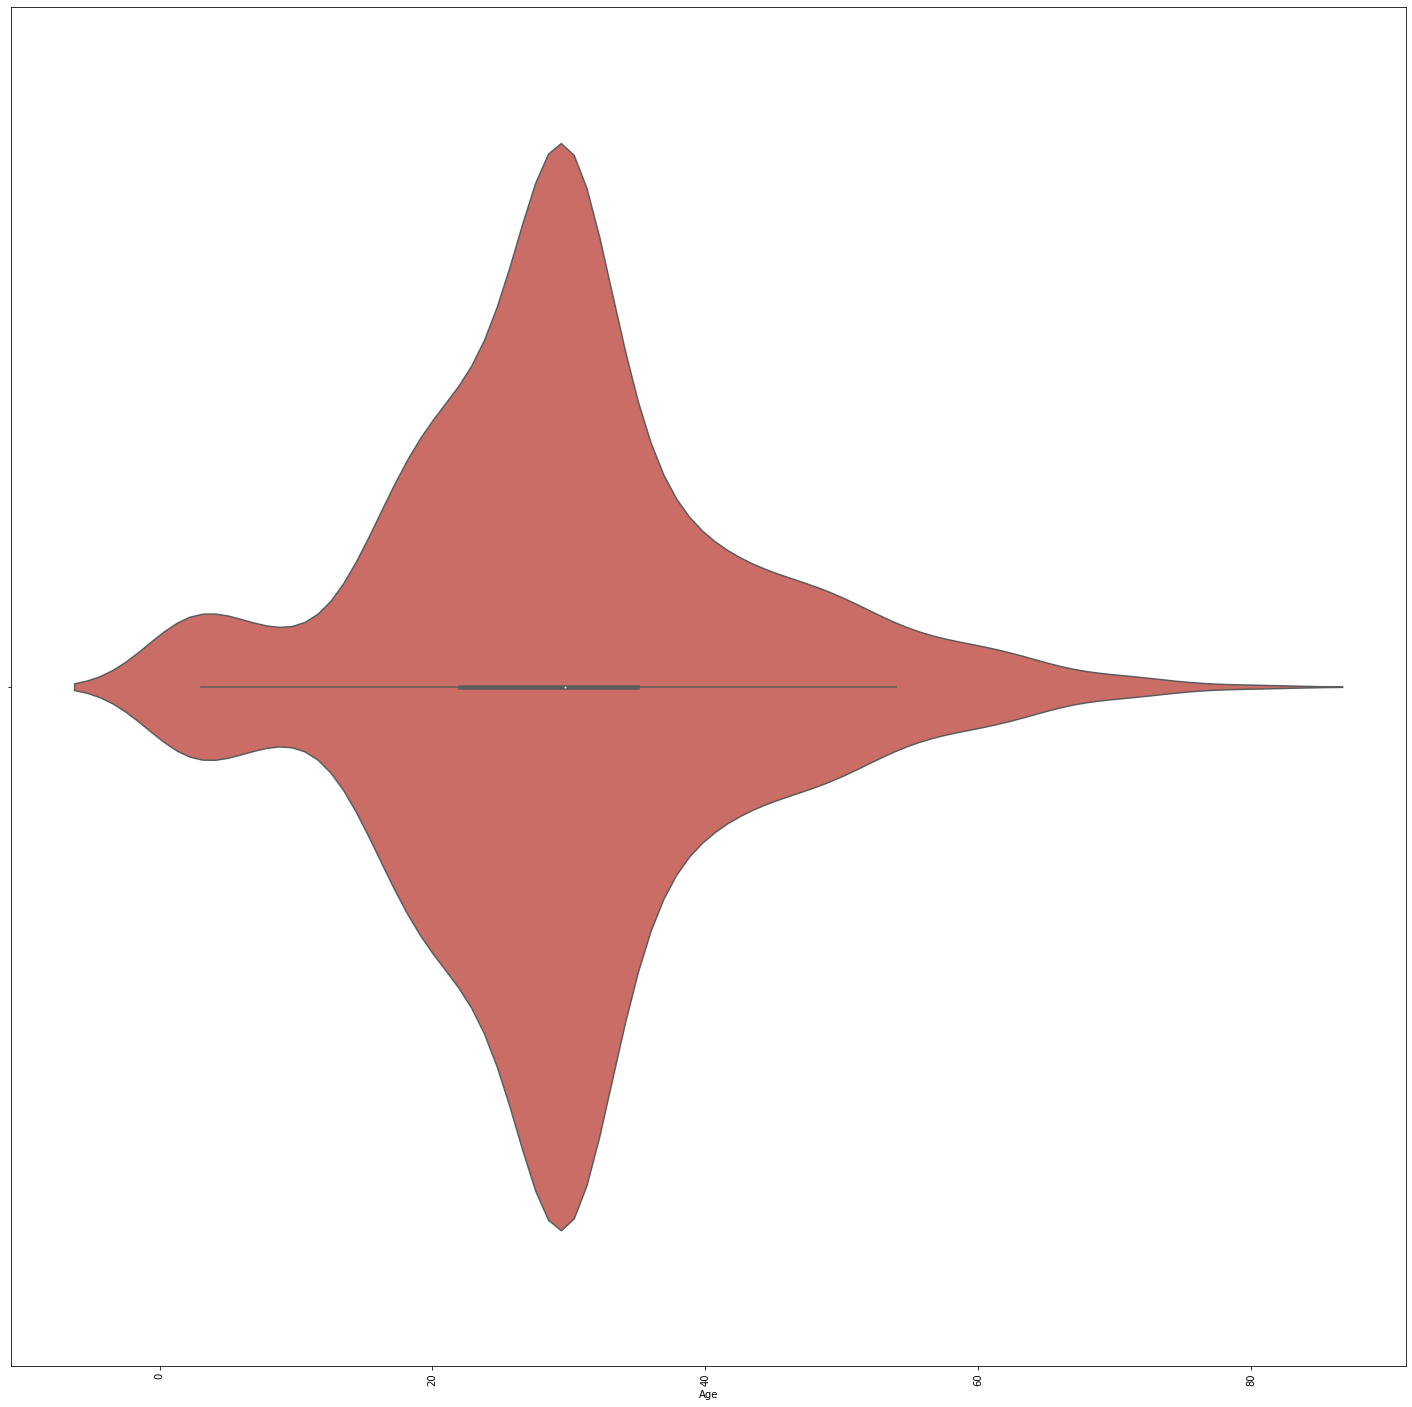

In [24]:
plt.figure(figsize=(25,25))
sns.violinplot(x=data_01['Age'], data = data_01, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

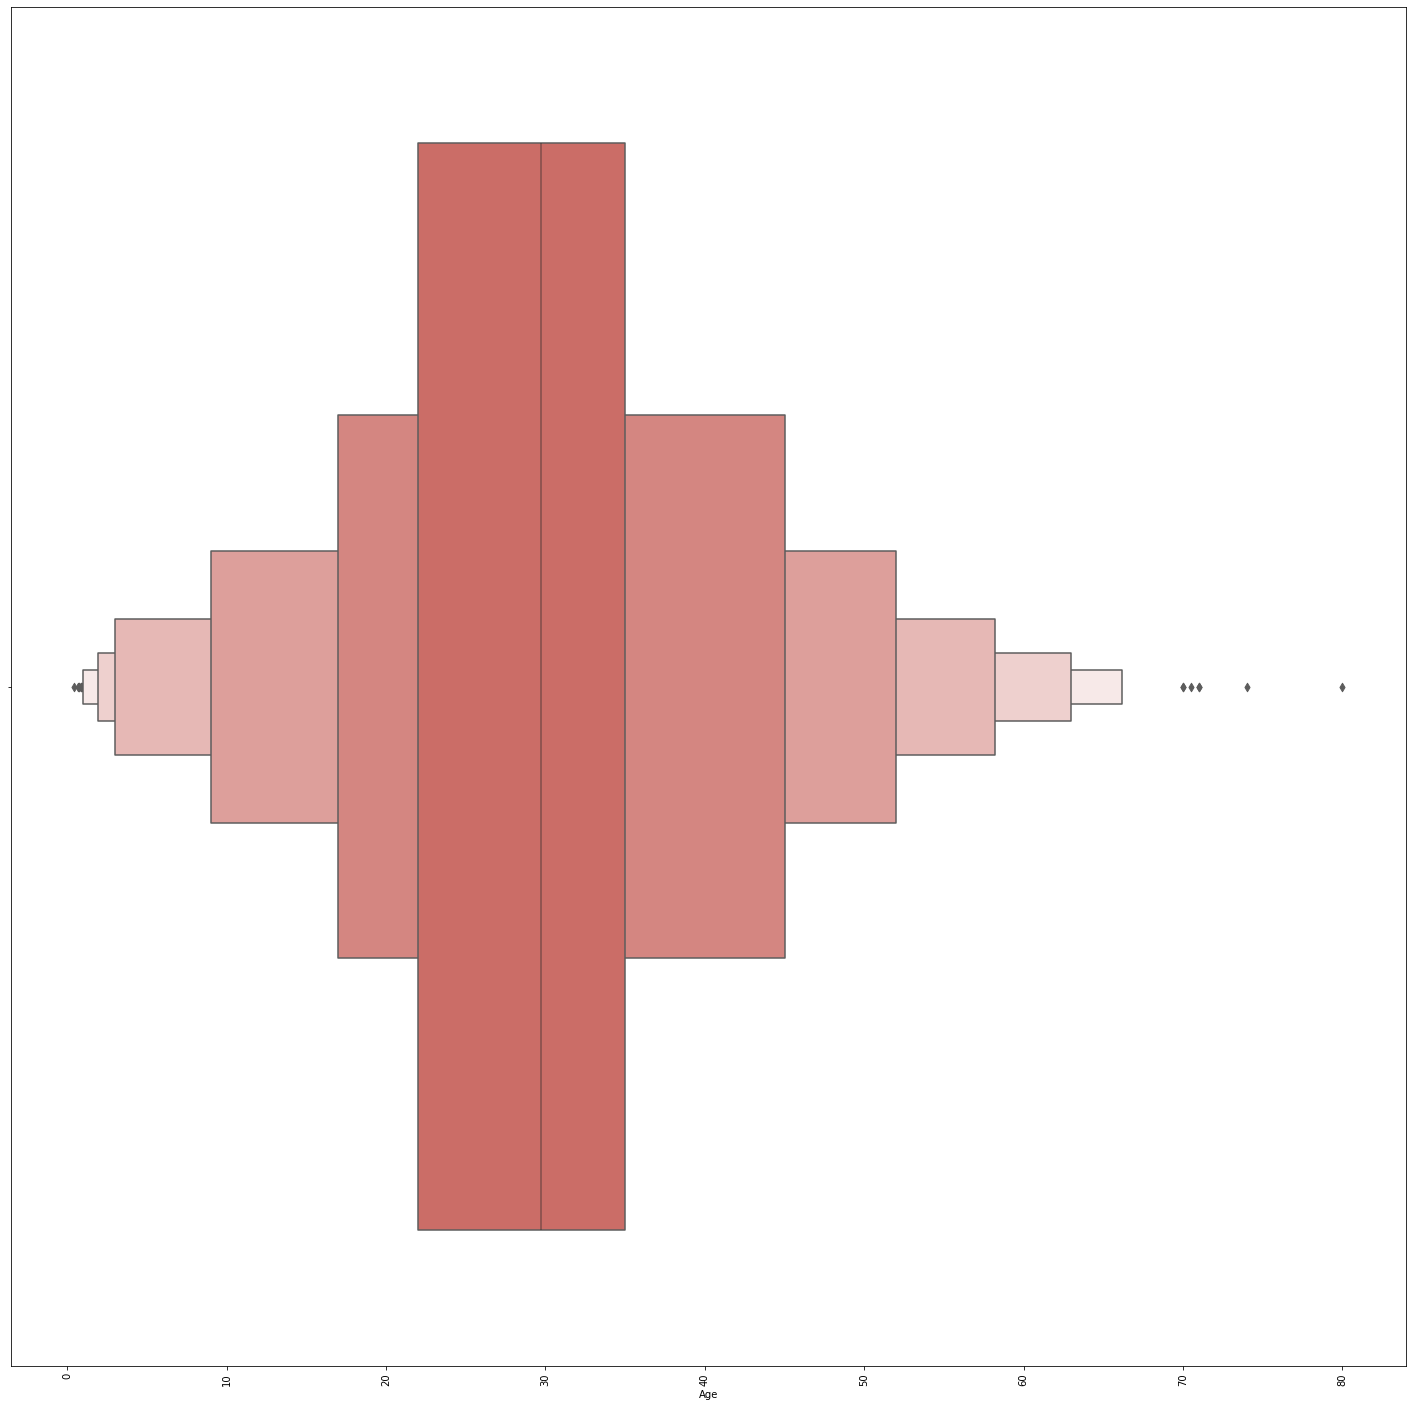

In [25]:
plt.figure(figsize=(25,25))
sns.boxenplot(x=data_01['Age'], data = data_01, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

#Correlation

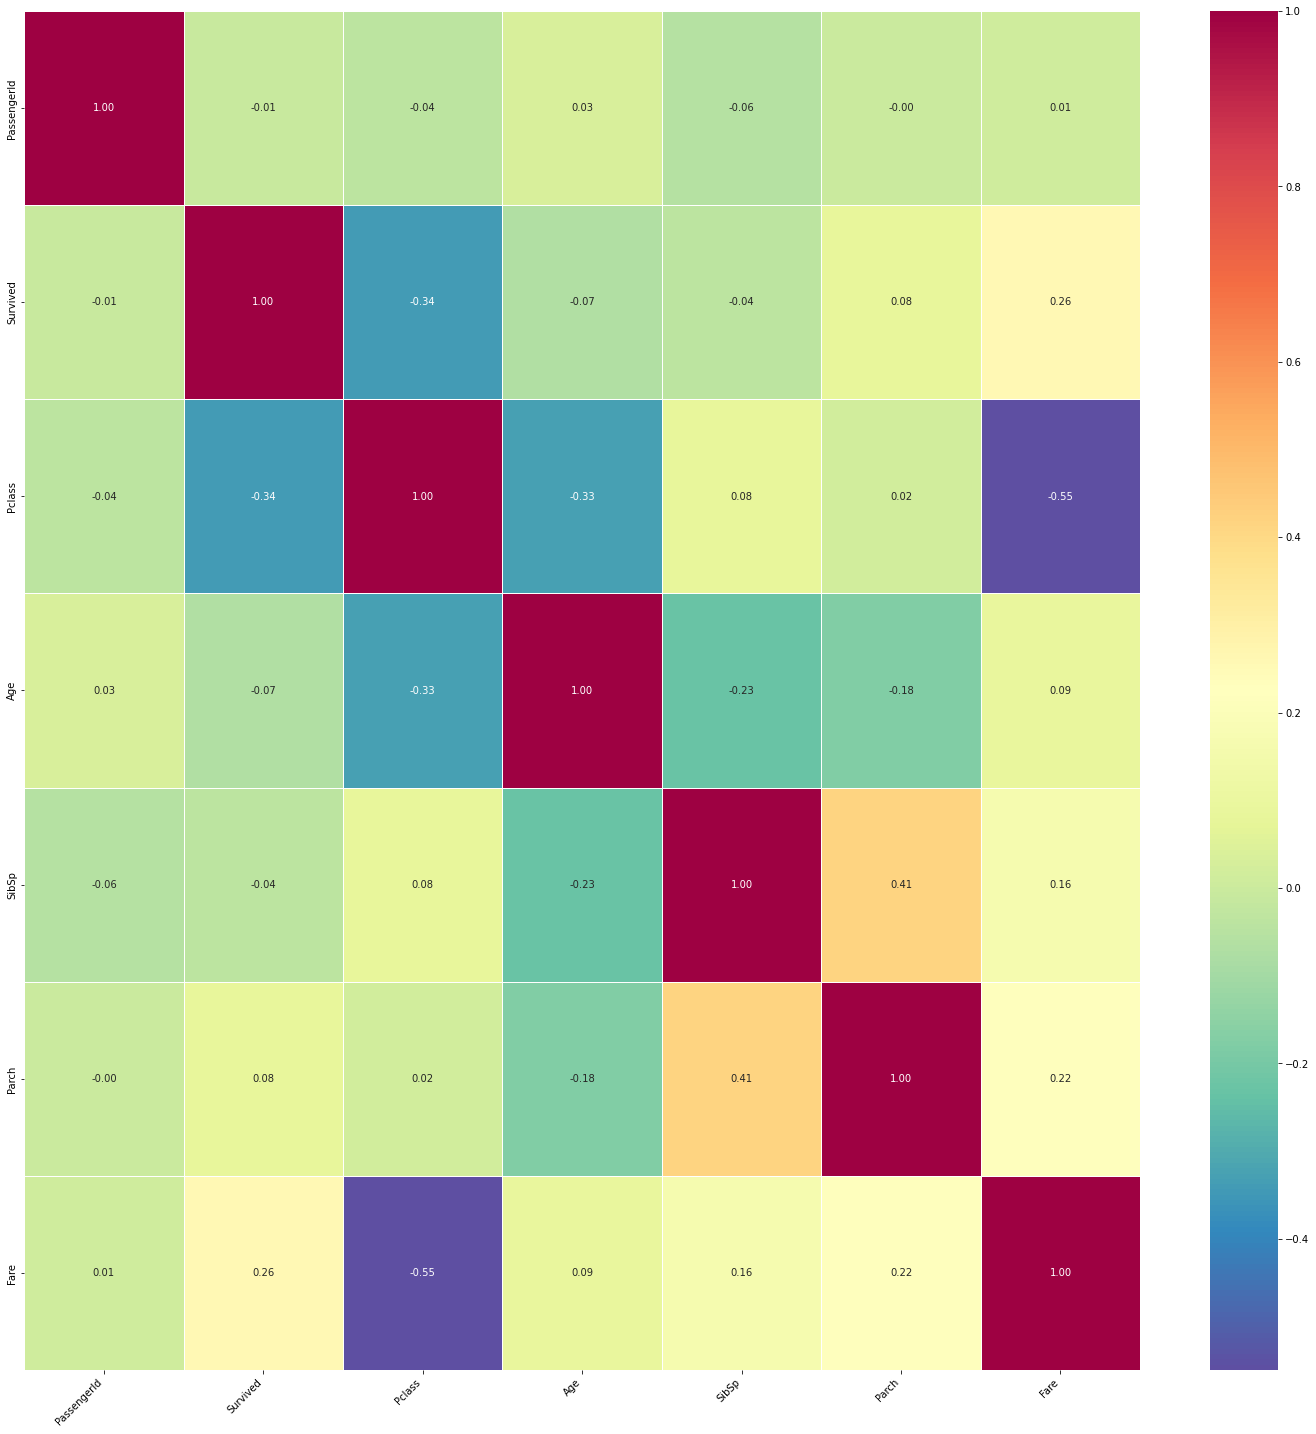

In [26]:
# Calculate the correlation matrix
corr_matrix = data_01.corr()
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25,25))
# Create the heatmap
sns.heatmap(corr_matrix, cmap='Spectral_r', annot=True, fmt='.2f', linewidths=.5)
# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

#Data Preprocessing 

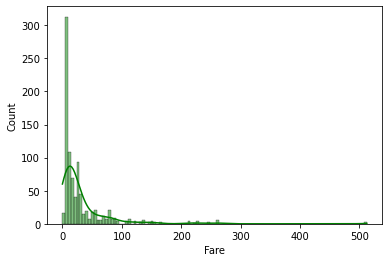

In [27]:
sns.histplot(data_01,x='Fare',kde=True,color='Green');

In [28]:
encoder = LabelEncoder()

In [29]:
data_01['Sex'] = encoder.fit_transform(data_01['Sex'])

In [30]:
data_01['Embarked'] = encoder.fit_transform(data_01['Embarked'])

In [31]:
data_01.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [32]:
data_01 = data_01.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

(array([[891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [113., 542., 179.,  50.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0

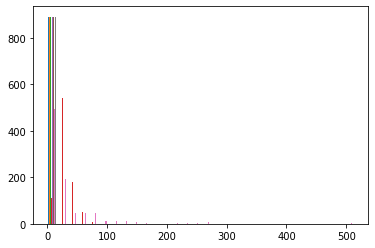

In [33]:
plt.hist(data_01,bins = 30 )

#Split the data into training and testing sets

In [34]:
X = data_01.drop('Survived', axis=1)
y = data_01['Survived']

#Logistic Regression

In [35]:
scaler = MinMaxScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)

In [41]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1])

In [42]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8161434977578476


In [43]:
# calculate precision
precision = precision_score(y_test, y_pred)
print(precision)

0.7222222222222222


In [44]:
# calculate recall
recall = recall_score(y_test, y_pred)
print(recall)

0.7123287671232876


In [45]:
# calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7172413793103448


In [46]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[130  20]
 [ 21  52]]


#Decision Tree Classifier

In [47]:
model = DecisionTreeClassifier()

In [48]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = model.predict(X_test)

In [50]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.820627802690583


In [51]:
# calculate precision
precision = precision_score(y_test, y_pred)
print(precision)

0.746268656716418


In [52]:
# calculate recall
recall = recall_score(y_test, y_pred)
print(recall)

0.684931506849315


In [53]:
# calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7142857142857143


In [54]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[133  17]
 [ 23  50]]


In [55]:
print( "The End" )

The End
